In [1]:
import os
import pandas as pd
from policies.mappo import MAPPO
from environment.optimization_environment import OptimizationEnv
from environment.utils import parse_config
from datetime import datetime
import numpy as np
import seaborn as sns
import os
import neptune
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy
from other_algorithms.pso import ParticleSwarmOptimizer
import time
from scipy.stats import multivariate_normal
from dotenv import load_dotenv
load_dotenv()

Using device: cpu


True

In [2]:
def initialize(config_path, mode="train", **kwargs):
    env = OptimizationEnv(config_path)
    agent_policy = MAPPO(config_path)
    if mode == "test" or mode == "benchmark":
        model_path = kwargs.get("model_path", None)
        if model_path is None:
            raise ValueError("Model path must be provided for testing")
        agent_policy.load(model_path)
    return env, agent_policy

def print_items(**kwargs):
    for key, value in kwargs.items():
        print(key, value)
        
def get_action(observation_info, agent_policy, env):
    observation, observation_std = observation_info
    actions = np.zeros((env.n_agents, env.n_dim))
    for dim in range(env.n_dim):
        observation[dim] = observation[dim].astype(np.float32)
        #print(observation[dim])
        observation_std[dim] = observation_std[dim].astype(np.float32)
        action = agent_policy.select_action(observation[dim], observation_std[dim])
        actions[:, dim] = action
    return actions

# def cal_densities(points):
#     densities = np.array([multivariate_normal(mean=mean, cov=cov, allow_singular=True).pdf(points)
#                               for mean, cov in zip(env.gmm.gmm.means_, env.gmm.gmm.covariances_)])
#     return densities

# def cal_densities_variances(densities):
#     variances = []
#     for dim in range(densities.shape[0]):
#         densities_variances = np.var(densities[dim], axis=0)
#         print(densities_variances)
#         variances.append(densities_variances)
#     return variances

In [3]:
config_path = 'config/config.json'
model_path = "models/model.pth"
mode = "train"
env, agent_policy = initialize(config_path, mode=mode, model_path=model_path)
config = parse_config(config_path)
agent_policy.set_action_std(config["test_action_std"])

def display_gmm_details(gmm):
    print("Means: ", gmm.means_)
    print("Covariances: ", gmm.covariances_)
    print("Weights: ", gmm.weights_)


In [4]:
_ = env.reset()

Using Surrogate Model


Using Surrogate Model
Iteration:  0


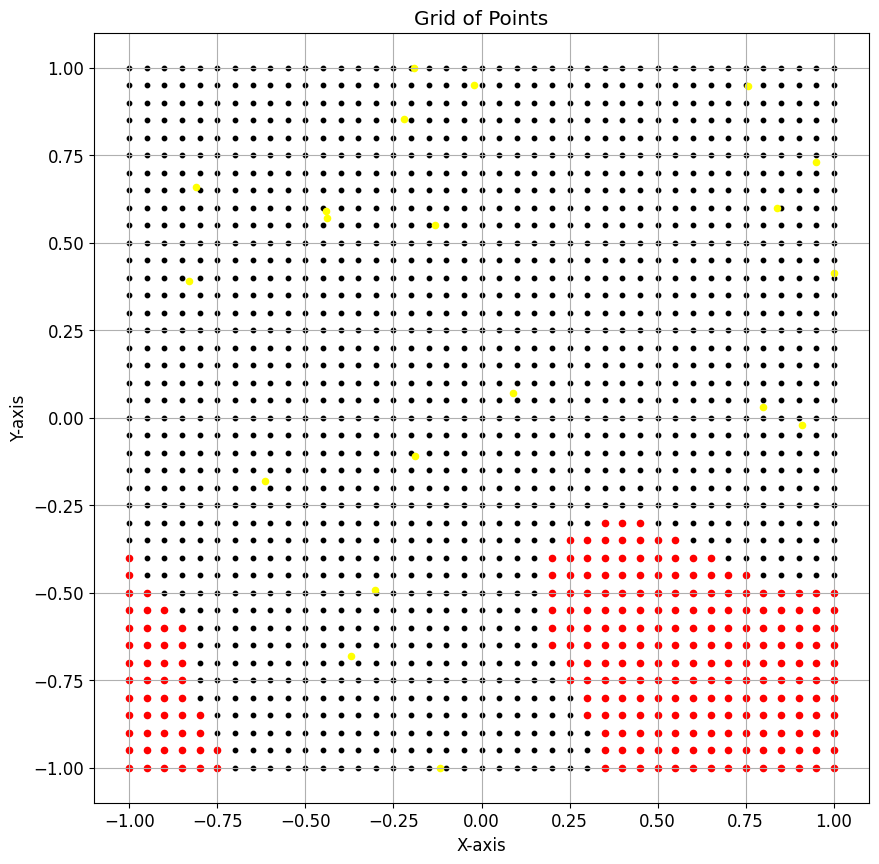

Reward:  0.15645831014897243
0.8494943486020226
Std - 0.8158218351817769
Iteration:  1


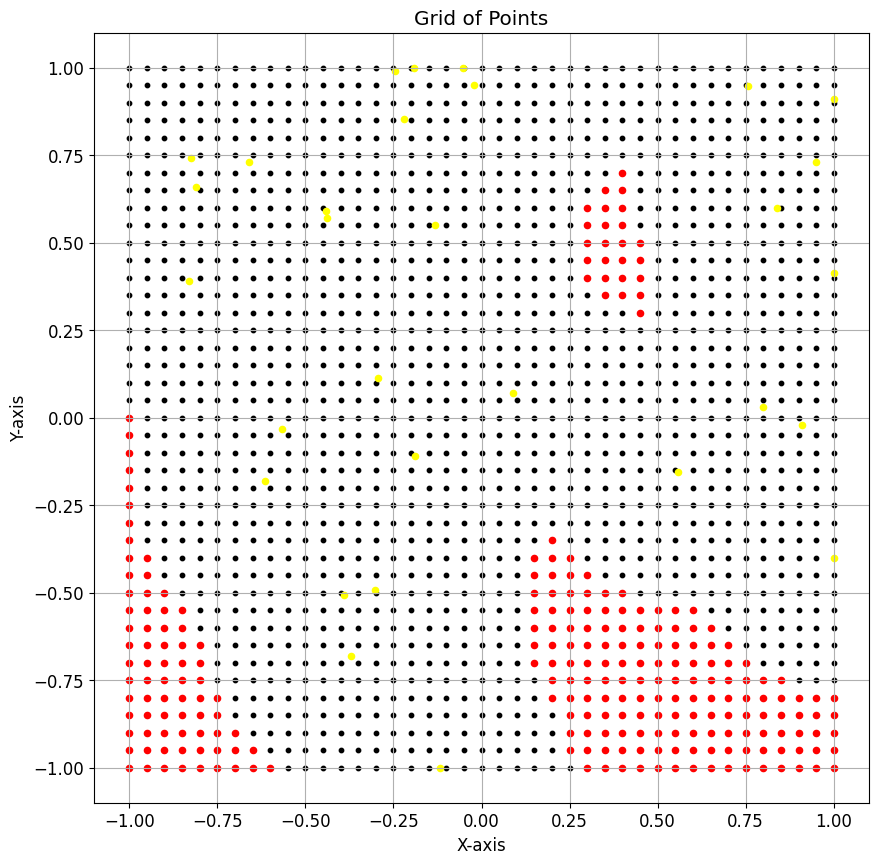

Reward:  0.12666689300602335
0.8494943486020226
Std - 0.85089142356924
Iteration:  2


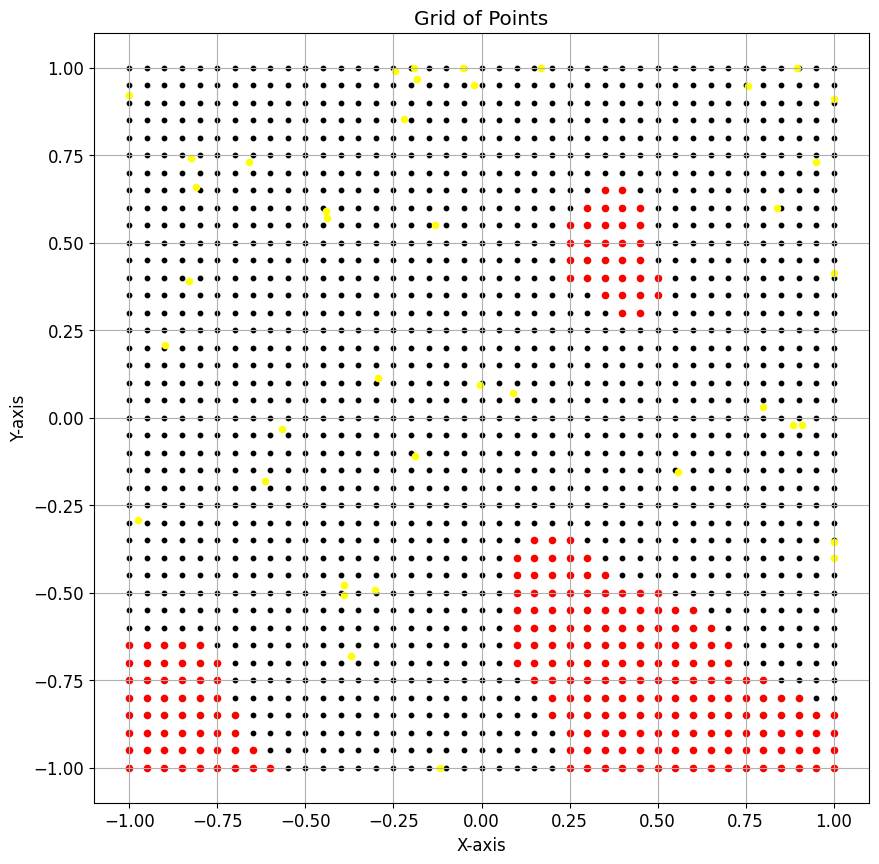

Reward:  0.03884518468057381
0.8494943486020226
Std - 0.9542725802184562
Iteration:  3


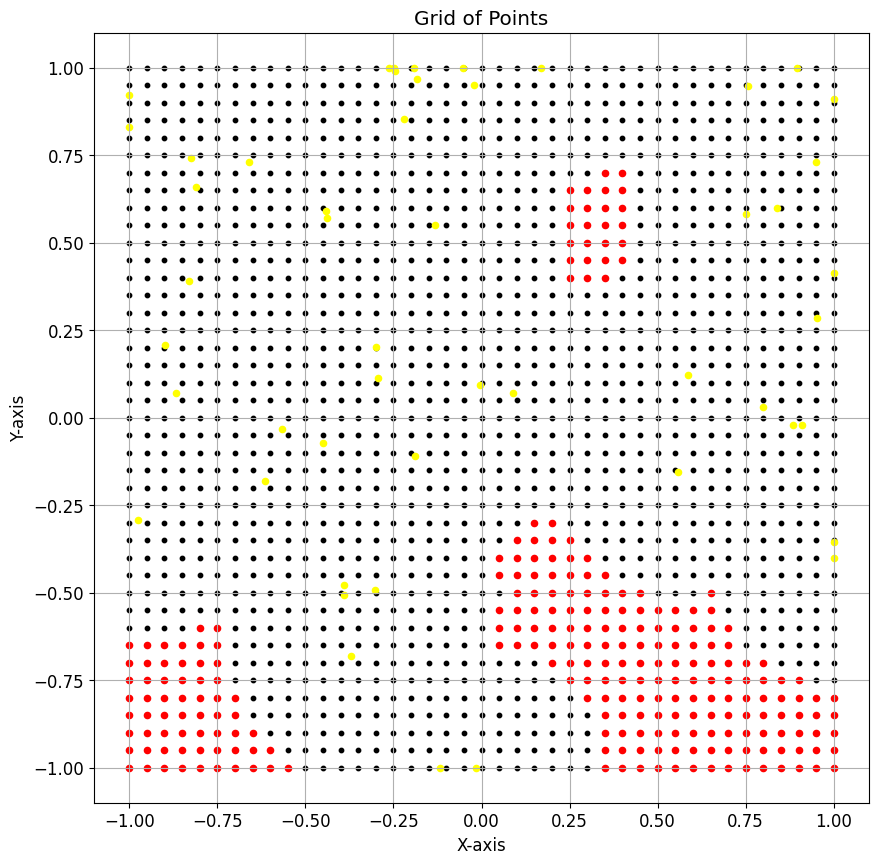

Reward:  0.35538637083091984
0.8494943486020226
Std - 0.5816495172501567
Iteration:  4


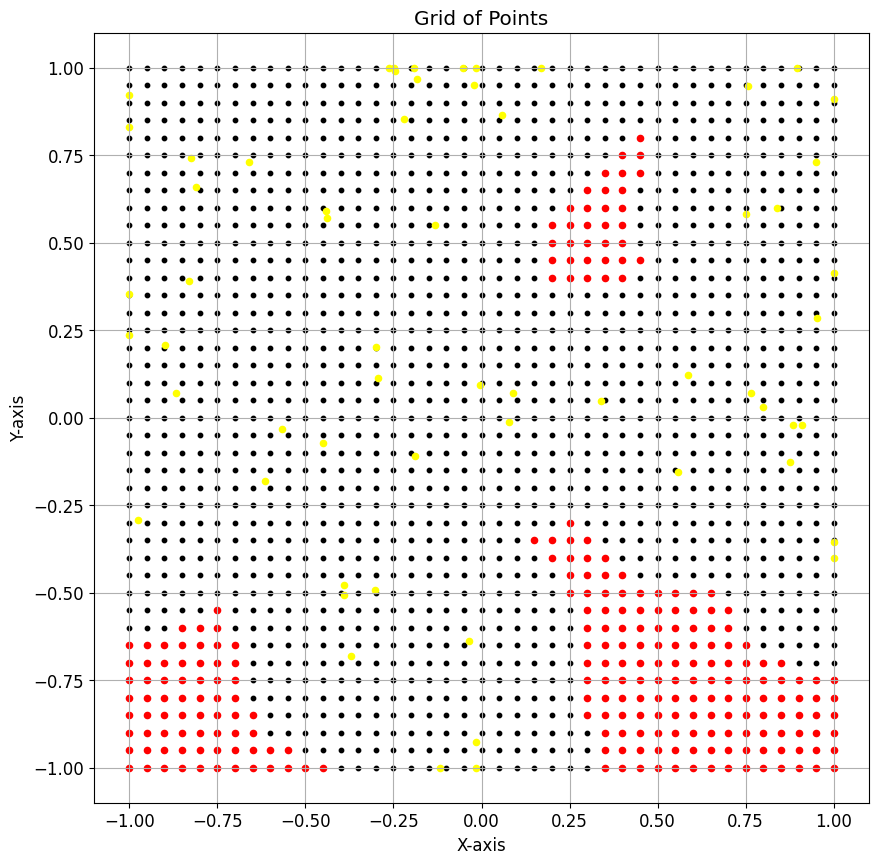

Reward:  0.2933062262157212
0.8494943486020226
Std - 0.6547284549939584
Iteration:  5


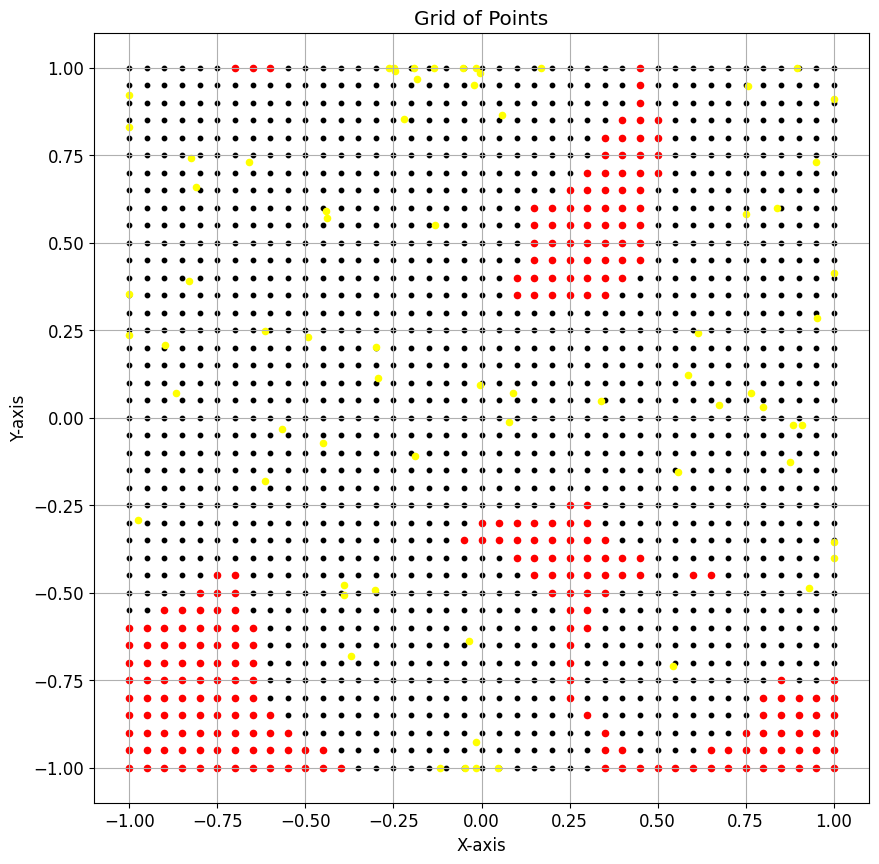

Reward:  0.26156570378364596
0.8494943486020226
Std - 0.6920924733471226
Iteration:  6


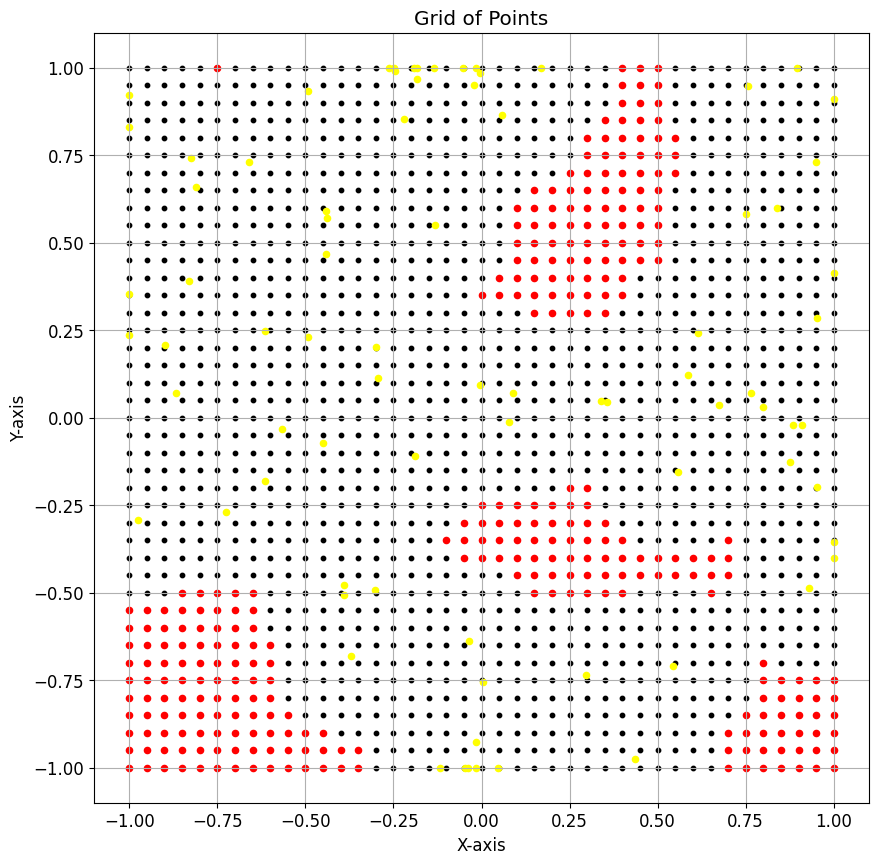

Reward:  0.46593950221005753
0.8155859607376562
Std - 0.42870583281173824
Iteration:  7


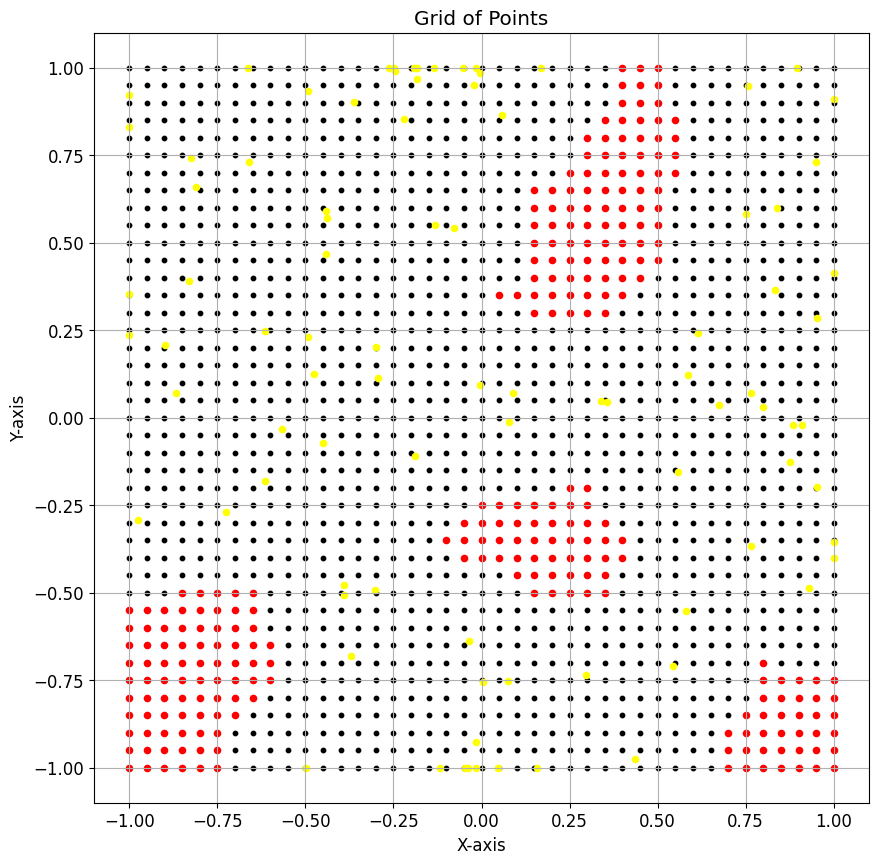

Reward:  0.4607411762227021
0.8441403926234384
Std - 0.45418892372772207
Iteration:  8


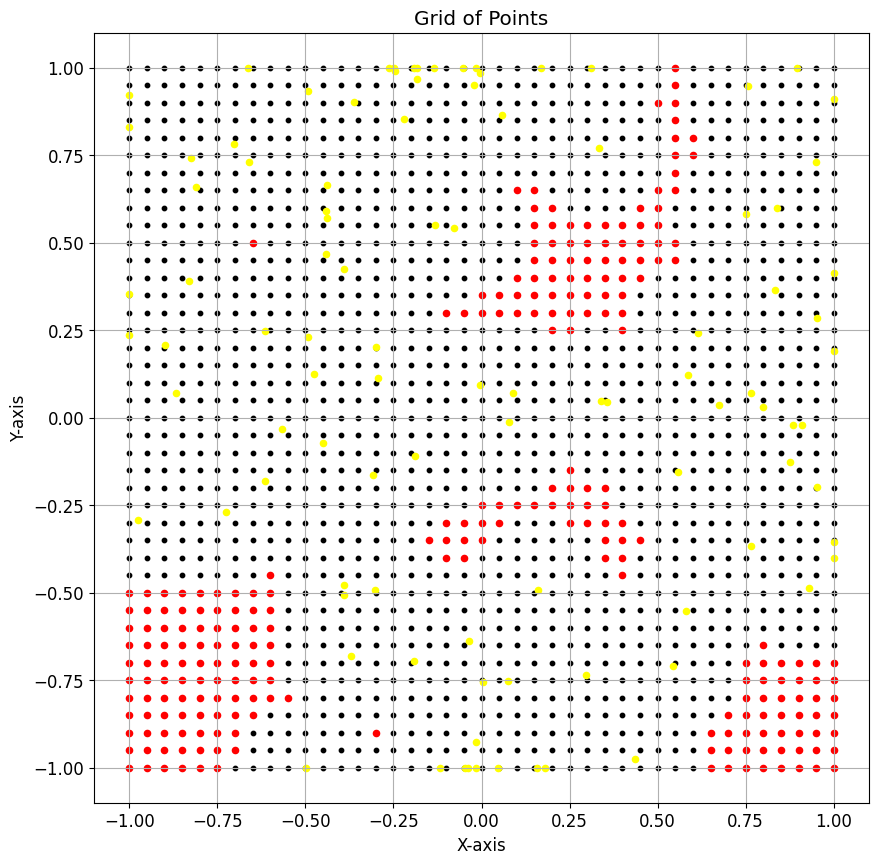

Reward:  0.4404901739906881
0.8494943486020226
Std - 0.48146779938491124
Iteration:  9


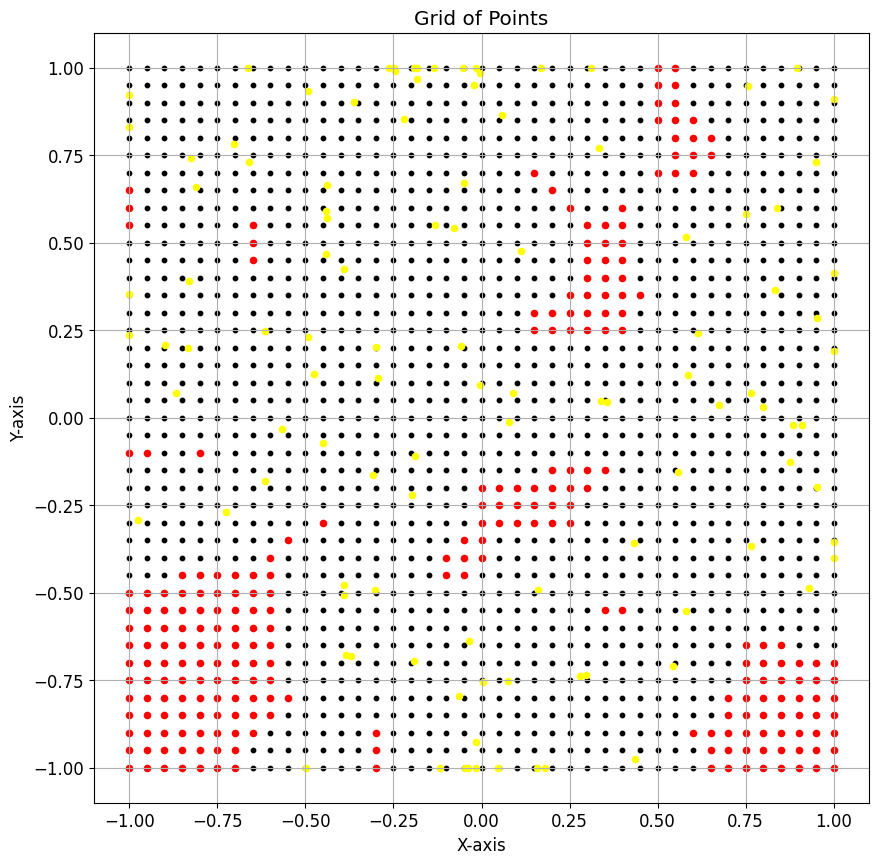

Reward:  0.4255720649948499
0.8494943486020226
Std - 0.49902896270564234
Iteration:  10


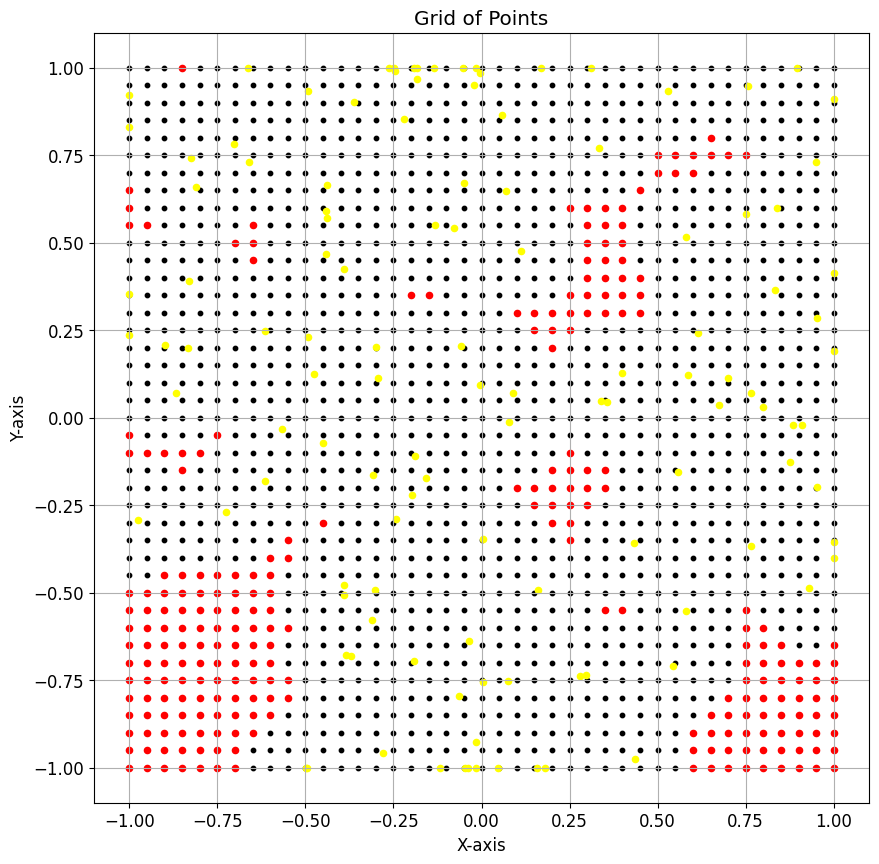

Reward:  0.3986784194751268
0.8494943486020226
Std - 0.5306873787551204


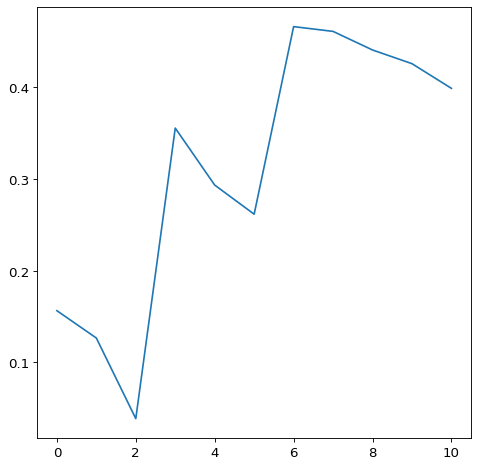

In [13]:
observation_info = env.reset()
rewards = []
std_comp = []
hig_std_comp = []
iters = 11
results_buffer = np.zeros((iters, 4))
for i in range(iters):
    print("Iteration: ", i)
    # if i % 1 == 0:
        # _, std = env.surrogate.evaluate(env.surrogate.checkpoints)
        # _ = env.surrogate.cal_reward(
        # std_comp.append(1-std_std)
        # print("Reward: ", reward)
        # print("Std: ", std_std)
        # print("total_reward: ", reward + (1 - std_std))
        # combined_reward = reward * np.exp(-0.1 * max(0, 1- std_std))
        # results_buffer[i] = [reward, (1 - std_std), reward * (1 - std_std), combined_reward]
        # # env.surrogate.plot_variance()
        
        # rewards.append(reward + (1 - std_std))
        
    #action =  get_action(observation_info, agent_policy, env)
    action = np.random.uniform(-0.3, 0.3, (env.n_agents, env.n_dim))
    observation_info, reward, done, info = env.step(action)
    rewards.append(np.mean(reward)) 
    env.surrogate.plot_checkpoints_state()
    print("Reward: ", np.mean(reward))
    print(1 - env.surrogate.percent_high_std / 100)
    std_std = np.std(env.surrogate.checkpoints_std)
    print(f"Std - {std_std}")
    
    

    

plt.plot(rewards)

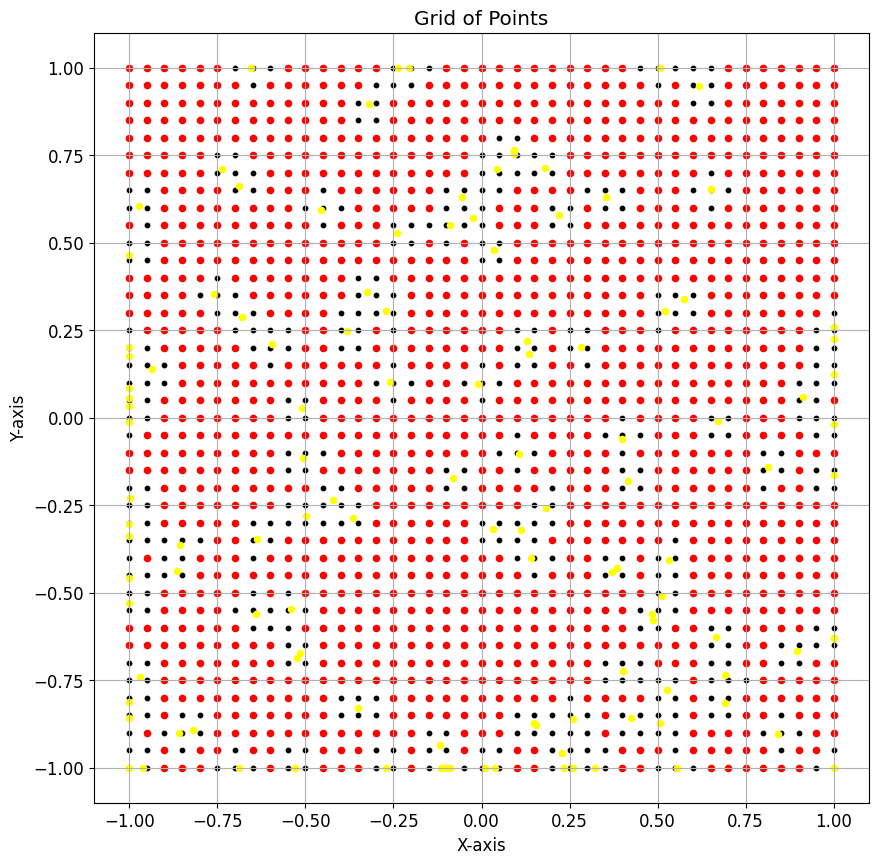

In [8]:
env.surrogate.plot_checkpoints_state()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


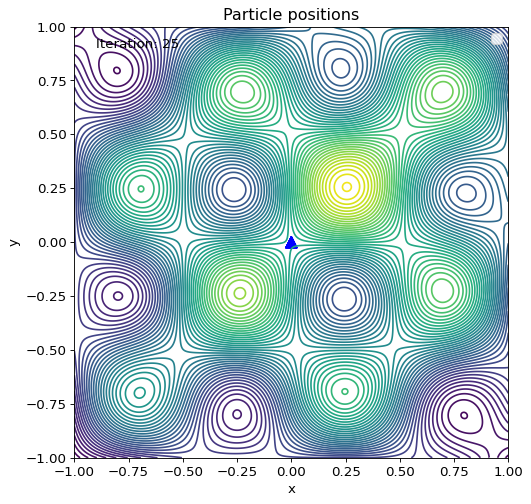

In [11]:
env.render(type="history", file_path="new_history.gif")

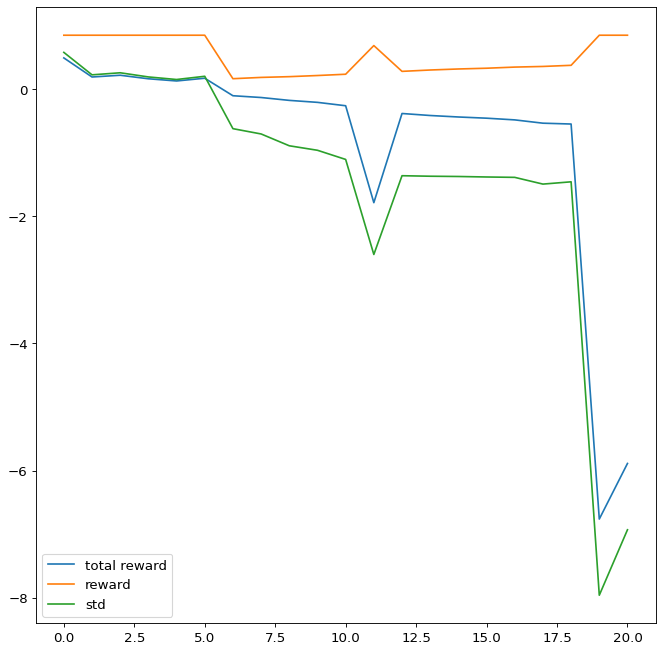

In [6]:
fig = plt.figure(figsize=(10, 10), dpi=80)
plt.plot(results_buffer[:, 2], label="total reward")
plt.plot(results_buffer[:, 0], label="reward")
plt.plot(results_buffer[:, 1], label="std")

plt.legend()
plt.show()


In [10]:
results_buffer

array([[ 0.84949435,  0.57956111,  0.49233389,  0.80166048],
       [ 0.84949435,  0.22612632,  0.19209303,  0.8305006 ],
       [ 0.84949435,  0.25854136,  0.21962942,  0.82781289],
       [ 0.84949435,  0.19307272,  0.16401418,  0.83325025],
       [ 0.84949435,  0.15264225,  0.12966873,  0.83662594],
       [ 0.84949435,  0.2033322 ,  0.17272956,  0.83239582],
       [ 0.16537775, -0.62094189, -0.10268997,  0.16537775],
       [ 0.18560381, -0.70430628, -0.13072193,  0.18560381],
       [ 0.19750149, -0.89025029, -0.17582576,  0.19750149],
       [ 0.21534801, -0.96096842, -0.20694263,  0.21534801],
       [ 0.23557406, -1.10501286, -0.26031237,  0.23557406],
       [ 0.68649613, -2.6006476 , -1.78533452,  0.68649613],
       [ 0.28078525, -1.36136561, -0.38225138,  0.28078525],
       [ 0.30220107, -1.36937864, -0.41382769,  0.30220107],
       [ 0.31826294, -1.37349272, -0.43713183,  0.31826294],
       [ 0.33016062, -1.38129736, -0.45604999,  0.33016062],
       [ 0.34800714, -1.

In [ ]:
mean, std = env.surrogate.evaluate(env.surrogate.checkpoints)
mean2, std2 = env.surrogate.evaluate(env.surrogate.checkpoints)

# check if the mean and std are the same
print(np.all(mean == mean2))
print(np.all(std == std2))